# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [354]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 

 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-null    object 
 12  Crops (%)                           225 non-null    object 
 13  Other (%)                           225 non-null    object 
 14  Climate                             205 non-null    object 
 15  Birthrate                           224 non-null    object 
 16  Deathrate                           223 non-null    object 
 17  Agriculture                         212 non-null    object 
 18  Industry                            211 non-null    object 
 19  Service                             212 non-null    object 
 

- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [355]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [356]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [357]:

print(df["Region"].value_counts())
print(df["Country"].value_counts())

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64
Afghanistan     1
Rwanda          1
Nauru           1
Nepal           1
Netherlands     1
               ..
Greece          1
Greenland       1
Grenada         1
Guadeloupe      1
Zimbabwe        1
Name: Country, Length: 227, dtype: int64


In [358]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [359]:
bool_series = df.duplicated()
bool_series=bool_series[bool_series==True]
bool_series

Series([], dtype: bool)

In [360]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [361]:
# Renaming columns for better usability
new_column_name = {'Area (sq. mi.)':'Area' , 'Pop. Density (per sq. mi.)':'Pop_density' , 
                  'Coastline (coast/area ratio)':'Coastline' , 
                  'Infant mortality (per 1000 births)':'Infant_mortality' , 'GDP ($ per capita)':'GDP_per_capita' ,
                  'Literacy (%)':'Literacy_percent' , 'Phones (per 1000)':'Phones_per_k' , 'Arable (%)':'Arable' ,
                   'Crops (%)':'Crops' ,'Other (%)':'Other'}
df = df.rename(columns = new_column_name )
df

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- remove non value with zero and take care that we handle 'Climate' column  and drop other coloum      <br>
2-  Replace all decimal values with decimal point instead of commas and change data type from str to float           <br>
3- Convert the decimal values in 'Climate' column to integer values to match the feature type(Ordinal). Must be in one of the classes : {1,2,3,4,}          <br>

In [362]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [363]:
df

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [364]:
#solution 
df=df.fillna(0)
df.isnull().sum()

Country             0
Region              0
Population          0
Area                0
Pop_density         0
Coastline           0
Net migration       0
Infant_mortality    0
GDP_per_capita      0
Literacy_percent    0
Phones_per_k        0
Arable              0
Crops               0
Other               0
Climate             0
Birthrate           0
Deathrate           0
Agriculture         0
Industry            0
Service             0
dtype: int64

In [365]:
df=df.drop(columns=['Other'],axis=0)

In [366]:
#test 
df

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,2,"22,46","3,27",0,0,0
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,3,"8,71","6,25",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,0,"145,2","16,9","18,97",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",0,0,0.0,0,0,"0,02",0,1,0,0,0,0,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03",2,41,"19,93","0,22","0,29","0,489"


**Second issue**

In [367]:
#solution 
cols= df[['Pop_density' , 'Coastline' , 'Net migration' , 'Infant_mortality' , 
           'Literacy_percent' , 'Phones_per_k' , 'Arable' , 'Crops'  , 'Climate' 
           , 'Birthrate' , 'Deathrate' , 'Agriculture' ,'Industry' , 'Service']]
for c in cols:
    df[c] = df[c].astype(str)
    new_data = []
    for val in df[c]:
        val = val.replace(',','.')
        val = float(val)
        new_data.append(val)

    df[c] = new_data


In [368]:
#test 
df

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,3.0,8.71,6.25,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,0.0,145.2,16.90,18.97,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.0,0.0,0.02,0.00,1.0,0.00,0.00,0.000,0.000,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,2.0,41.00,19.93,0.220,0.290,0.489


In [369]:
print(df.Climate.unique())
df['Climate'] = df['Climate'].astype('int')
print(df.Climate.unique())
print(df.Climate.value_counts().sort_values(ascending=False))
df.Climate.replace(0,2,inplace=True)
df.Climate.unique()

[1.  3.  2.  0.  4.  1.5 2.5]
[1 3 2 0 4]
2    114
3     48
1     37
0     22
4      6
Name: Climate, dtype: int64


array([1, 3, 2, 4])

In [370]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Country"]=le.fit_transform(df["Country"])
df["Region"]=le.fit_transform(df["Region"])
df

,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,1,46.60,20.34,0.380,0.240,0.380
1,1,3,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,3,15.11,5.22,0.232,0.188,0.579
2,2,6,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,1,17.14,4.61,0.101,0.600,0.298
3,3,8,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,2,22.46,3.27,0.000,0.000,0.000
4,4,10,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,3,8.71,6.25,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,5,2460492,5860,419.9,0.00,2.98,19.62,800.0,0.0,145.2,16.90,18.97,3,31.67,3.92,0.090,0.280,0.630
223,223,6,273008,266000,1.0,0.42,0.00,0.00,0.0,0.0,0.0,0.02,0.00,1,0.00,0.00,0.000,0.000,0.400
224,224,5,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,1,42.89,8.30,0.135,0.472,0.393
225,225,9,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,2,41.00,19.93,0.220,0.290,0.489


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [371]:
# from sklearn import preprocessing

In [372]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
colomName=df.columns
print(colomName)
features=df[colomName]
df[colomName] = scaler.fit_transform(features.values)
df


Index(['Country', 'Region', 'Population', 'Area', 'Pop_density', 'Coastline',
       'Net migration', 'Infant_mortality', 'GDP_per_capita',
       'Literacy_percent', 'Phones_per_k', 'Arable', 'Crops', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')


,Country,Region,Population,Area,Pop_density,Coastline,Net migration,Infant_mortality,GDP_per_capita,Literacy_percent,Phones_per_k,Arable,Crops,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.000000,0.0,0.023631,0.037920,0.002950,0.000000,1.000000,0.852921,0.012704,0.360,0.003090,0.195299,0.004341,0.000000,0.918589,0.683927,0.494148,0.264901,0.398323
1,0.004425,0.3,0.002720,0.001683,0.007658,0.001447,0.364586,0.112558,0.081670,0.865,0.068752,0.339559,0.087214,0.666667,0.297851,0.175521,0.301691,0.207506,0.606918
2,0.008850,0.6,0.025056,0.139485,0.000848,0.000046,0.467650,0.162142,0.108893,0.700,0.075415,0.051844,0.004933,0.000000,0.337867,0.155010,0.131339,0.662252,0.312369
3,0.013274,0.8,0.000039,0.000012,0.017847,0.066949,0.006356,0.048486,0.145191,0.970,0.250579,0.161005,0.295975,0.333333,0.442736,0.109953,0.000000,0.000000,0.000000
4,0.017699,1.0,0.000049,0.000027,0.009348,0.000000,0.626334,0.021183,0.344828,1.000,0.480108,0.035743,0.000000,0.666667,0.171693,0.210155,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.982301,0.5,0.001867,0.000343,0.025806,0.000000,0.544154,0.102620,0.014519,0.000,0.140209,0.272098,0.374309,0.666667,0.624285,0.131809,0.117035,0.309051,0.660377
223,0.986726,0.6,0.000202,0.015578,0.000061,0.000482,0.476504,0.000000,0.000000,0.000,0.000000,0.000322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.419287
224,0.991150,0.5,0.016324,0.030920,0.002495,0.000413,0.476504,0.321670,0.014519,0.502,0.035921,0.044759,0.004736,0.000000,0.845456,0.279085,0.175553,0.520971,0.411950
225,0.995575,0.9,0.008748,0.044076,0.000940,0.000000,0.476504,0.461792,0.014519,0.806,0.007918,0.113991,0.000592,0.333333,0.808200,0.670141,0.286086,0.320088,0.512579


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

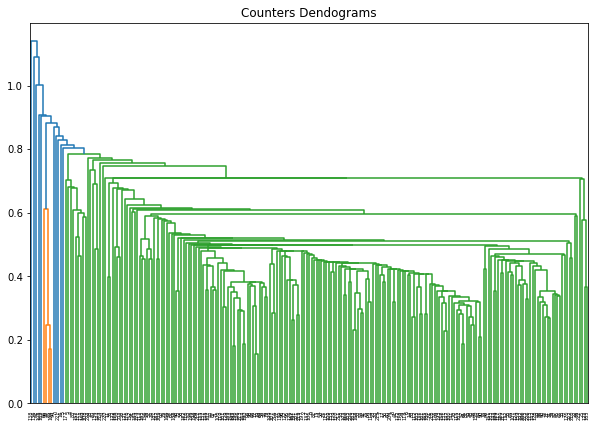

In [373]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df , method="single",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [374]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import  silhouette_score

agg_clust = AgglomerativeClustering(3)
agg_clust.fit_predict(df)
print(agg_clust.labels_)


silhouette_avg = silhouette_score(df, agg_clust.labels_)
silhouette_avg

[2 2 2 0 0 1 0 0 2 2 0 0 0 2 0 2 2 0 2 0 2 1 0 2 2 0 1 2 0 2 2 1 2 1 2 1 0
 2 0 1 1 2 2 2 1 1 1 2 2 1 0 2 2 2 0 1 2 2 2 2 2 2 1 1 2 1 0 2 0 0 2 2 1 1
 0 2 0 1 0 0 0 2 2 0 2 0 1 1 2 2 2 2 2 0 2 2 2 2 0 0 0 0 2 2 0 2 2 1 0 2 2
 2 2 2 2 2 1 1 2 0 2 0 2 0 1 1 2 2 1 0 2 2 1 0 0 2 2 2 0 2 0 2 1 1 0 2 0 2
 2 0 2 1 1 0 0 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 1 0 2 2 0 2 2 0 2 2 1 2 2 1 2
 0 2 1 1 1 0 2 1 2 1 0 0 2 2 2 1 2 1 2 2 2 2 2 0 1 1 2 2 0 0 2 2 1 2 2 0 0
 0 0 2 1 1]


0.17386402957190372

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 